In [10]:
%pylab inline
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


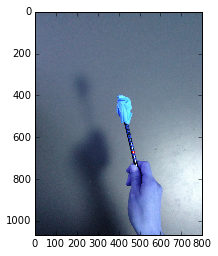

In [33]:
img_filename = "images/table_pencil/table_pencil_%s.jpg" % i
image = cv2.imread(img_filename)
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
cv2.circle(image, maxLoc, 5, (255, 0, 0), 2)

plt.imshow(image)

In [31]:
print maxLoc

(468, 672)
